# Warming-up Exercise: Emulating OR / XOR Using Perceptrons Model

- Coursework Admin: Junru Lu
- Office: CS2.18
- Email: junru.lu@warwick.ac.uk
- Codes: https://github.com/LuJunru/CS331-Neural-Computing-Tutorials

## Main Introduction
- Before doing the coursework, let's do some warming-up exercise: emulating OR / XOR gate:
  - Subtask1: emulating OR gate with single-layer perceptron
  - Subtask2: emulating XOR gate:
    - First method: by combining a series of single-layer perceptrons (OR, NOT and AND gates)
    - Second method: by building a two-layer NN with Step function units and Relu units respectively
- This exercise is not a part of your assessment, but can help review some related concepts.

In [1]:
from IPython.display import Image
prefix = 'https://raw.githubusercontent.com/LuJunru/CS331-Neural-Computing-Tutorials/master/'
pics = ["Week6/Logic-Gates.png", "Week2/xor-answer.png", "Week6/xor_multilayer_solution.jpg"]
pic_links = [prefix + pic for pic in pics]

import warnings
warnings.simplefilter("ignore")

## 1. Python Code for Emulating OR gate
- In the 1st tutorial, we emulated AND gate. Let's do this for OR gate

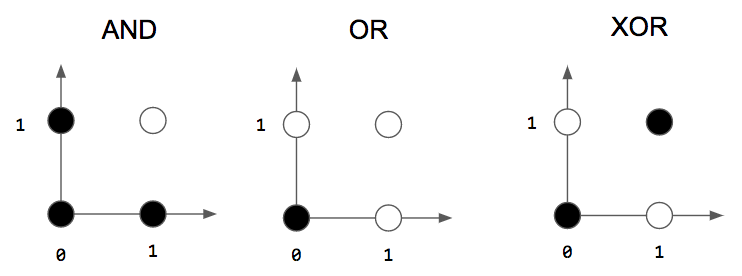

In [2]:
Image(pic_links[0])

In [3]:
# Based on Udacity's codes: intro to deep learning with PyTorch
import pandas as pd
import numpy as np
np.random.seed(10)

# 1st: Set up inputs and outputs for OR
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [0, 1, 1, 1]
outputs = []

In [4]:
# 2nd: Set up activation function
def StepF(Xi, W, b):
    linear_combination = (np.matmul(Xi, W) + b)[0]
    if linear_combination > 0:
        output = 1
    else:
        output = 0
    return linear_combination, output
            
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(y)):
        _, output = StepF(X[i], W, b)
        
        if output != y[i]:
            if output == 0:
                W[0] += X[i][0] * learn_rate
                W[1] += X[i][1] * learn_rate
                b += learn_rate
            elif output == 1:
                W[0] -= X[i][0] * learn_rate
                W[1] -= X[i][1] * learn_rate
                b -= learn_rate
    return W, b

    
# This function runs the perceptron algorithm repeatedly on the dataset
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + max(X.T[0])
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
    return W, b

trained_w, trained_b = trainPerceptronAlgorithm(np.array(test_inputs), correct_outputs, learn_rate=0.1)

In [5]:
# 3rd: check results
for test_input, correct_output in zip(test_inputs, correct_outputs):
    
    """
    Fill the code below with trained weights and bias
    """
    linear_combination, output = """Fill the code"""
    
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
# Print output
num_wrong = len([output[-1] for output in outputs if output[-1] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', 
                                              '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))
print("Your weights and bias are:", trained_w[0][0], trained_w[1][0], trained_b)

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0             -0.066352                    0          Yes
      0          1              0.054400                    1          Yes
      1          0              0.704969                    1          Yes
      1          1              0.825721                    1          Yes
Your weights and bias are: 0.771320643266746 0.1207519493594015 -0.06635176507372509


## 2. Python Code for Emulating XOR gate
- Congratulations! Your OR gate looks great! Let's do this for XOR. We have two methods. One is to build a network following the exercise we did in 1st tutorial, the other is to build a multi-layer NN. What's more, it is possible that linear perceptron can not deal with digital alphabet data in coursework (subtask4). Thus, it is important to learn how to build a multi-layer NN in advance, which is easy for sklearn and pytorch but difficult for pure numpy.

## 2.1. Build XOR with AND, NOT and OR gates

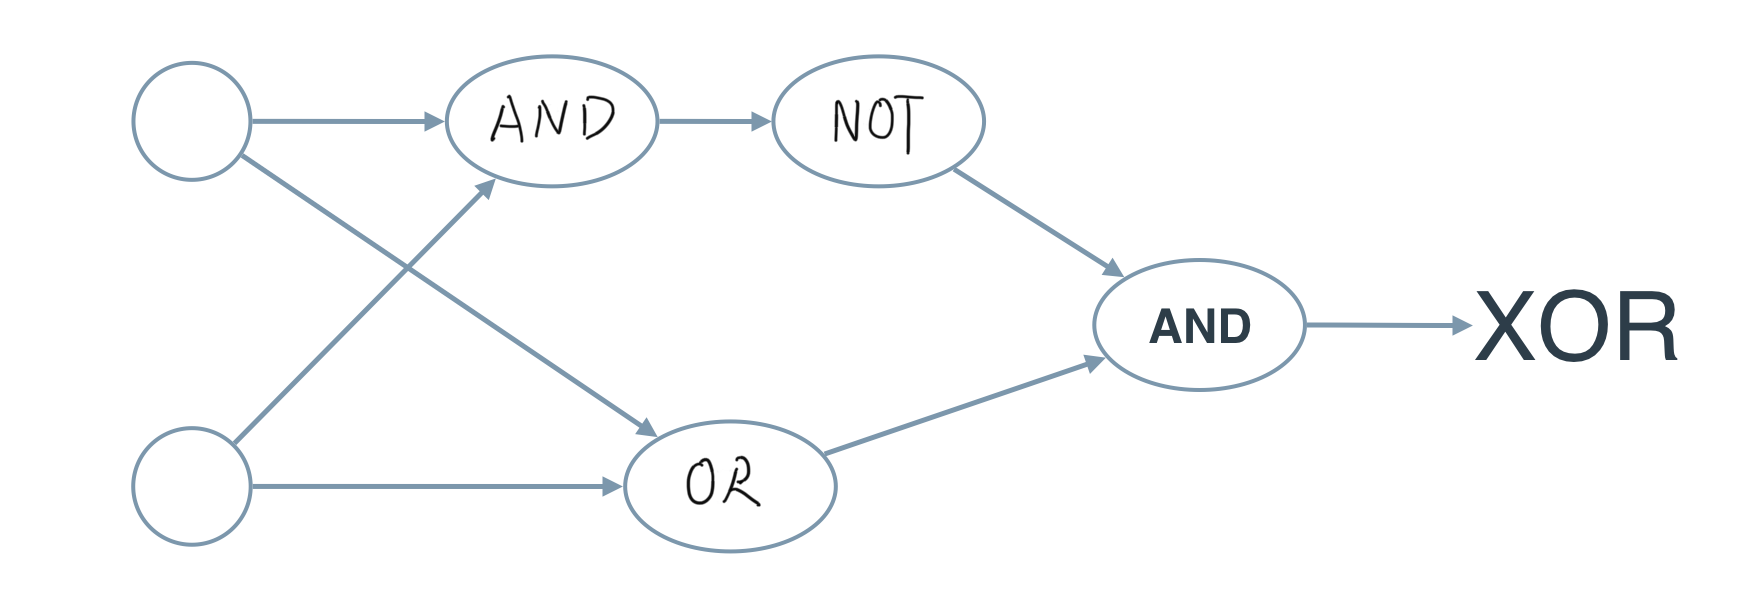

In [6]:
Image(pic_links[1])

In [7]:
# 1st: set up all inputs and outputs
import numpy as np
np.random.seed(10)

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_OR_outputs = [0, 1, 1, 1]
correct_AND_outputs = [0, 0, 0, 1]
correct_XOR_outputs = [0, 1, 1, 0]
outputs = []

In [8]:
trained_OR_w, trained_OR_b = trainPerceptronAlgorithm(np.array(test_inputs), correct_OR_outputs, learn_rate=0.1)
trained_AND_w, trained_AND_b = trainPerceptronAlgorithm(np.array(test_inputs), correct_AND_outputs, learn_rate=0.1)

for test_input, correct_output in zip(test_inputs, correct_XOR_outputs):
    
    """
    Fill the code below with trained weights and bias
    """
    _, and_1st_output = """Fill the code"""
    _, or_output = """Fill the code"""
    not_output = """Fill the code"""
    _, and_2nd_output = """Fill the code"""
    
    is_correct_string = 'Yes' if and_2nd_output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], and_1st_output, or_output, not_output, 
                    and_2nd_output, is_correct_string])

In [9]:
# 3rd: Print output
num_wrong = len([output[-1] for output in outputs if output[-1] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  and_1st_output', '  or_output', 
                                              '  not_output', '   and_2nd_output', ' Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))
print("Your OR gate weights and bias are:", trained_OR_w[0][0], trained_OR_w[1][0], trained_OR_b)
print("Your AND gate weights and bias are:", trained_AND_w[0][0], trained_AND_w[1][0], trained_AND_b)

Nice!  You got it all correct.

Input 1    Input 2    and_1st_output    or_output    not_output     and_2nd_output  Is Correct
      0          0                 0            0             1                  0         Yes
      0          1                 0            1             1                  1         Yes
      1          0                 0            1             1                  1         Yes
      1          1                 1            1             0                  0         Yes
Your OR gate weights and bias are: 0.771320643266746 0.1207519493594015 -0.06635176507372509
Your AND gate weights and bias are: 0.24880388253861194 0.09850701230259046 -0.2752033544691524


## 2.2. Multi-layer NN solution
- Let's look closer to the structure above: if we merge the 1st AND gate with the NOT gate, the structure looks like a multi-layer NN (Two input nodes, Two nodes in hidden layer, and One output node).
- In fact, the effect of hidden layer can be viewed as projection. Points in XOR cases can not be linearly separable in 2-dimension coordinates, so we try to project them into different coordinates or higher dimension coordinates that easy for linearly separable. The following picture shows 2 relu units in h1 and h2 project the 4 XOR points into 3 linearly separable points.

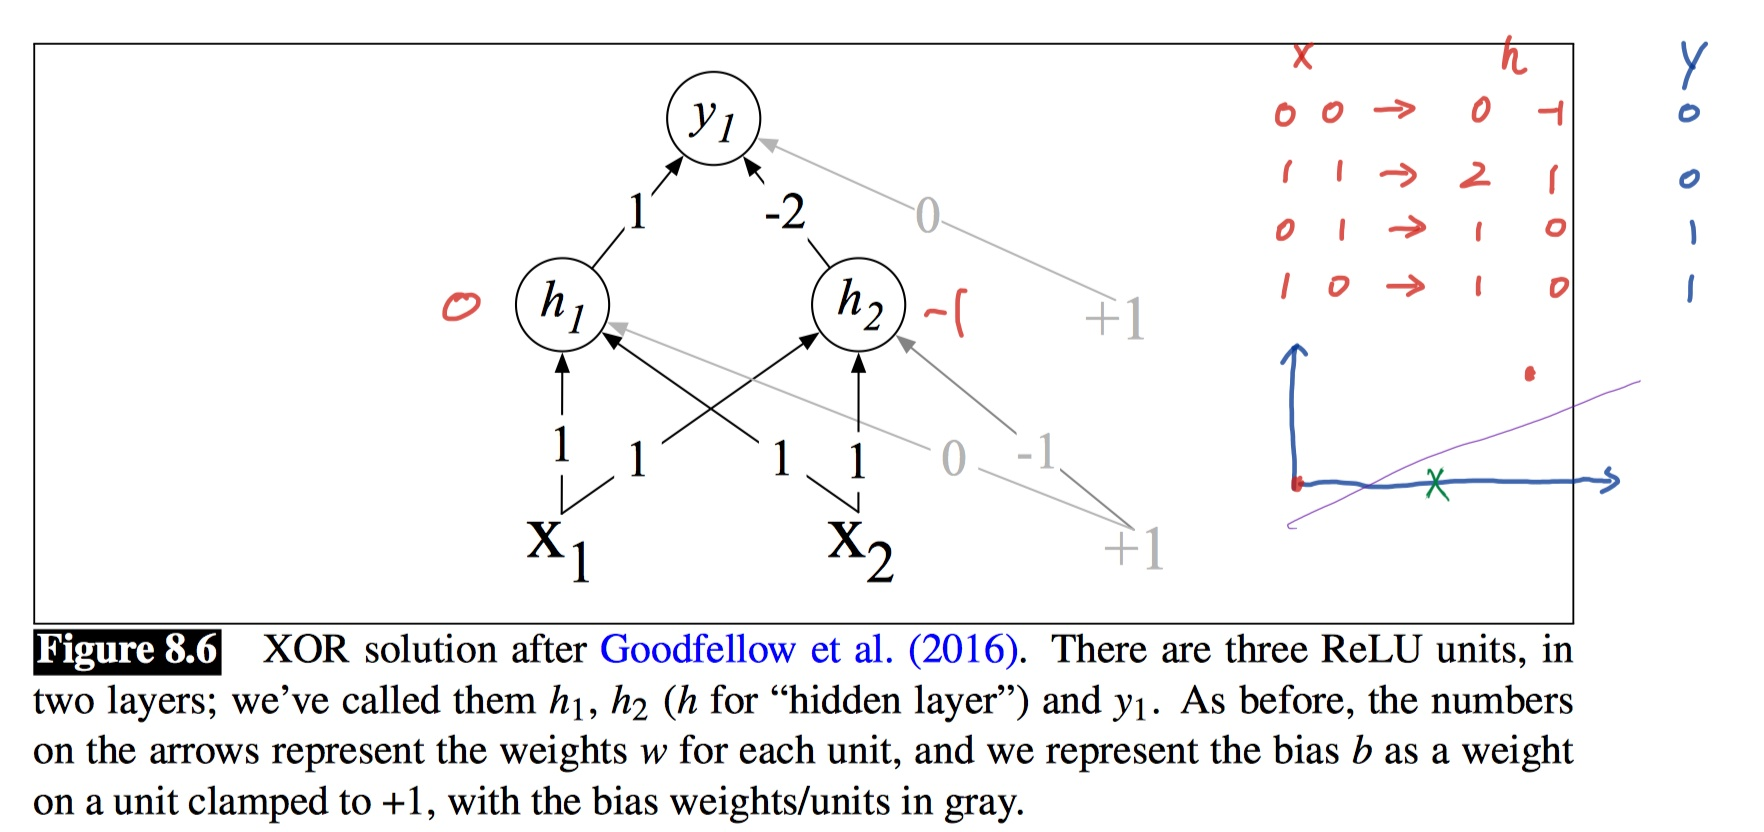

In [10]:
Image(pic_links[2])

- Theoretically, we can use the same structure like the 3 relu units with step functions units to create an XOR gate.
- However, as we all know:
  - The updating rate = error * learn_rate * input * derivative of activation function
  - Derivative of Step function: 1
  - Derivative of Relu function: 0 if input < 0 else 1
- Compared with step function, Relu can compute much quicker and more stable. Therefore, although we can use both step function units and relu units to build a multi-layer NN for XOR, we often set more hidden units for the former one
- The structure we use is slightly different from above picture: the last output unit in our structure is a simple linear one **without** any activation function.

### 2.2.1. Step function in hidden layer

In [11]:
# Based on Udacity's codes: intro to deep learning with PyTorch
import numpy as np
np.random.seed(10)

# 1st: Set up inputs and outputs for XOR
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [0, 1, 1, 0]
outputs = []

# It would be easier to handle bias by taking it as 1-dimension input in complex NN
# The input of bias is 1
x = np.array([(test_input[0], test_input[1], 1) for test_input in test_inputs])
y = np.array(correct_outputs)

# Hyperparameters
input_dimension = x.shape[1]
hidden_size = 10

In [12]:
# 2nd: Set up activation function
def StepF(Xi, W):
    linear_combination = np.matmul(Xi, W)
    output = linear_combination.copy()
    output[output > 0] = 1
    output[output <= 0] = 0
    return linear_combination, output
            
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def multilayerStep(X, y, W1, W2, learn_rate=0.01):
    loss = 0
    for i in range(len(y)):
        _, hiddenlayer_output = StepF(X[i], W1)  # (1, 3) * (3, 10) -> (1, 10)
        output = np.matmul(hiddenlayer_output, W2)  # (1, 10) * (10, 1) -> (1, 1)
        loss += np.square(output - y[i])
        
        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (output - y[i])  # the last layer's error, (1, 1)
        grad_w2 = """Fill the code"""  # (10, 1) * (1, 1), input * error
        grad_hiddenlayer_output = grad_y_pred * W2  # the hidden layer's error, (1, 10)
        grad_hidden = grad_hiddenlayer_output.copy()
        grad_w1 = """Fill the code"""  # (3, 1) * (1, 10), input * error
        
        # Update weights
        W1 -= learn_rate * grad_w1
        W2 -= learn_rate * grad_w2
        
    return W1, W2, loss

    
# This function runs the perceptron algorithm repeatedly on the dataset
def train2layerPerceptronAlgorithmStep(X, y, learn_rate=0.001, num_epochs=25):
    W1 = np.random.randn(input_dimension, hidden_size)  # (3, 10)
    W2 = np.random.randn(hidden_size)  # (10, 1)
    losses = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W1, W2, loss = multilayerStep(X, y, W1, W2, learn_rate)
        losses.append(loss)
    return W1, W2, losses


trained_w1, trained_w2, step_losses = train2layerPerceptronAlgorithmStep(x, y, num_epochs=500)

In [13]:
for test_input, correct_output in zip(x, y):
    _, hiddenlayer_output = StepF(np.array(test_input), trained_w1)
    output = """Fill the code"""
    if output < 0.5:
        mapping_output = 0
    else:
        mapping_output = 1
    is_correct_string = 'Yes' if mapping_output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], hiddenlayer_output, output, mapping_output, is_correct_string])
    
# Print output
num_wrong = len([output[-1] for output in outputs if output[-1] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Hiddenlayer Output', 
                                              '  Output', '  Mapping Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))
print("Your weights and bias are:", trained_w1, trained_w2)

Nice!  You got it all correct.

Input 1    Input 2                                 Hiddenlayer Output    Output    Mapping Output   Is Correct
      0          0  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...  0.357762                 0          Yes
      0          1  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...  0.987607                 1          Yes
      1          0  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...  0.549088                 1          Yes
      1          1  [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...  0.097518                 0          Yes
Your weights and bias are: [[ 1.24460229  0.4474982  -1.55808914 -0.20632885  1.00409936 -0.69963865
   0.48118781 -0.04432584  0.28468481 -0.32733178]
 [ 0.55744341  1.53051375 -0.99345086  1.29615017 -0.33410574  0.40063844
  -1.38467513  0.33854652  1.00780734 -0.80092842]
 [-1.94477152 -1.66915718  0.25077561  2.45045005  0.96915394  1.65536013
   0.04595923  1.44640263 -0.41552502  0.69959733]] [-0.267317

### 2.2.2. Relu function in hidden layer

In [14]:
# Based on Udacity's codes: intro to deep learning with PyTorch
import numpy as np
np.random.seed(10)

# 1st: Set up inputs and outputs for XOR
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [0, 1, 1, 0]
outputs = []

# It would be easier to handle bias by taking it as 1-dimension input in complex NN
# The input of bias is 1
x = np.array([(test_input[0], test_input[1], 1) for test_input in test_inputs])
y = np.array(correct_outputs)

# Hyperparameters
input_dimension = x.shape[1]
hidden_size = 10

In [15]:
# 2nd: Set up activation function
def ReluF(Xi, W):
    linear_combination = np.matmul(Xi, W)
    output = np.maximum(linear_combination, 0)
    return linear_combination, output
            
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def multilayerRelu(X, y, W1, W2, learn_rate=0.01):
    loss = 0
    for i in range(len(y)):
        linear_combination, hiddenlayer_output = ReluF(X[i], W1)  # (1, 3) * (3, 10) -> (1, 10)
        output = np.matmul(hiddenlayer_output, W2)  # (1, 10) * (10, 1) -> (1, 1)
        loss += np.square(output - y[i])
        
        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (output - y[i])  # the last layer's error, (1, 1)
        grad_w2 = """Fill the code"""  # (10, 1) * (1, 1), input * error
        grad_hiddenlayer_output = grad_y_pred * W2  # the hidden layer's error, (1, 10)
        grad_hidden = grad_hiddenlayer_output.copy()
        """Fill the code"""  # the derivate of ReLU
        grad_w1 = """Fill the code"""  # (3, 1) * (1, 10), input * error
        
        # Update weights
        W1 -= learn_rate * grad_w1
        W2 -= learn_rate * grad_w2
        
    return W1, W2, loss

    
# This function runs the perceptron algorithm repeatedly on the dataset
def train2layerPerceptronAlgorithmRelu(X, y, learn_rate=0.001, num_epochs=25):
    W1 = np.random.randn(input_dimension, hidden_size)  # (3, 10)
    W2 = np.random.randn(hidden_size)  # (10, 1)
    losses = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W1, W2, loss = multilayerRelu(X, y, W1, W2, learn_rate)
        losses.append(loss)
    return W1, W2, losses


trained_w1, trained_w2, relu_losses = train2layerPerceptronAlgorithmRelu(x, y, num_epochs=200)

In [16]:
for test_input, correct_output in zip(x, y):
    _, hiddenlayer_output = ReluF(np.array(test_input), trained_w1)
    output = """Fill the code"""
    if output < 0.5:
        mapping_output = 0
    else:
        mapping_output = 1
    is_correct_string = 'Yes' if mapping_output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], hiddenlayer_output, output, mapping_output, is_correct_string])
    
# Print output
num_wrong = len([output[-1] for output in outputs if output[-1] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Hiddenlayer Output', 
                                              '  Output', '  Mapping Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))
print("Your weights and bias are:", trained_w1, trained_w2)

Nice!  You got it all correct.

Input 1    Input 2                                 Hiddenlayer Output    Output    Mapping Output   Is Correct
      0          0  [0.0, 0.0, 0.2726967370774788, 2.3563869521214...  0.134730                 0          Yes
      0          1  [0.0, 0.0, 0.0, 3.4717029858021577, 1.20642366...  0.743297                 1          Yes
      1          0  [0.0, 0.0, 0.0, 2.406542443064755, 1.666216321...  0.776182                 1          Yes
      1          1  [0.0, 0.6587306737581149, 0.0, 3.5218584767454...  0.287592                 0          Yes
Your weights and bias are: [[ 1.3315865   0.87654118 -1.54540029  0.05015549  0.48148322 -0.74395428
   0.33701547  0.14525836 -0.31185582 -0.28525174]
 [ 0.43302619  1.36429958 -0.96506567  1.11531603  0.02169055  0.41148358
  -1.13660221  0.19048856  1.29388523 -1.07980489]
 [-1.97772828 -1.58211009  0.27269674  2.35638695  1.18473311  1.68354005
   0.19013621  1.38113021 -0.46189976  0.46876733]] [-0.267317

### 2.2.3. Compare training ability of step function and relu function

Text(0.5, 1.0, 'Loss lines for XOR gate training')

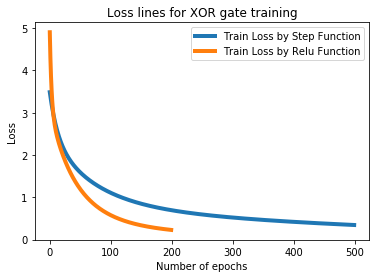

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(step_losses, linewidth=4, label="Train Loss by Step Function")
plt.plot(relu_losses, linewidth=4, label="Train Loss by Relu Function")
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Loss lines for XOR gate training')

- Try to play with different hyperparamters to compare training ability of step function and relu function. You can even replace them with other activation functions, such as sigmoid.